# Copyright Netherlands eScience Center <br>
** Function     : Lead/Lag regression of climatological fields with eddy decomposition on OMET with vertical profile in certain season** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2018.10.30 ** <br>
** Last Update  : 2018.12.10 ** <br>
Description     : This notebook includes the result of the lag regression of climatological fields (e.g. z500) on OMET. It aims to unveil the relation between the climatological fields and OMET and try to illustrate how the ocean drives the atmosphere through the change of OMET.
Besides, the contribution of stationary eddy and steady mean transport are studied here too.<br>
Return Values   : jpeg <br>

In [1]:
%matplotlib inline

import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # for color map
import os
import meta.statistics
import meta.visualizer

Initialization - Start with location of input and extraction of variables
Time span of each product:
- **ERA-Interim** 1979 - 2016
- **MERRA2**      1980 - 2016
- **JRA55**       1979 - 2015
- **ORAS4**       1958 - 2014
- **GLORYS2V3**   1993 - 2014
- **SODA3**       1980 - 2015

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

In [16]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met'
    datapath_ERAI_fields = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ERAI/regression'
    datapath_ORAS4_mask = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4'
    output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/MET_Feedback/figures/subFigures/E_eddy'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_ERAI_200hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_200hPa_point.nc'))
    dataset_ERAI_300hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_300hPa_point.nc'))
    dataset_ERAI_400hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_400hPa_point.nc'))
    dataset_ERAI_500hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_500hPa_point.nc'))
    dataset_ERAI_600hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_600hPa_point.nc'))
    dataset_ERAI_750hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_750hPa_point.nc'))
    dataset_ERAI_850hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_850hPa_point.nc'))
    dataset_ERAI_950hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
                                        'model_daily_075_E_eddies_950hPa_point.nc'))
    dataset_ERAI_E_vert = Dataset(os.path.join(datapath_ERAI_fields,
                                  'pressure_erai_monthly_regress_1979_2017_vertProfile_E.nc')) 
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath,
                                 'oras_model_monthly_1958_2017_omet.nc'))
    dataset_ORAS4_mask = Dataset(os.path.join(datapath_ORAS4_mask, 'mesh_mask.nc'))

*********************** extract variables *************************


In [4]:
    print ('*********************** total energy transported by eddies *************************')
    # calculate the total energy transported by eddies
    # extract time series from 1979 to 2016
    # from 20N - 90N
    latitude_eddy_ERAI = dataset_ERAI_500hPa_eddy.variables['latitude'][:]
    longitude_eddy_ERAI = dataset_ERAI_500hPa_eddy.variables['longitude'][:]
    year_eddy = dataset_ERAI_500hPa_eddy.variables['year'][:-1]
    
    p200_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p200_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p300_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p300_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p400_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p400_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p500_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p500_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p600_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p600_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p750_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p750_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p850_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    p850_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    #p950_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    #p950_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    
    p200_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p300_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p400_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p500_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p600_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p750_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    p850_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    #p950_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)
    # list of variables
    var_book = ['cpT', 'Lvq', 'gz']
    factor = [constant['cp'],constant['Lv'],1]
    # 4D fields [year, month, lat, lon]
    # eddies at certain height
    # zonal mean of eddies at certain height
    for var_op in np.arange(3):
        # extract energy transported by eddies at different pressure levels
        p200_transient_zonal_var = dataset_ERAI_200hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p200_standing_zonal_var = dataset_ERAI_200hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p300_transient_zonal_var = dataset_ERAI_300hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p300_standing_zonal_var = dataset_ERAI_300hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p400_transient_zonal_var = dataset_ERAI_400hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p400_standing_zonal_var = dataset_ERAI_400hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p500_transient_zonal_var = dataset_ERAI_500hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p500_standing_zonal_var = dataset_ERAI_500hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p600_transient_zonal_var = dataset_ERAI_600hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p600_standing_zonal_var = dataset_ERAI_600hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p750_transient_zonal_var = dataset_ERAI_750hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p750_standing_zonal_var = dataset_ERAI_750hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        p850_transient_zonal_var = dataset_ERAI_850hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        p850_standing_zonal_var = dataset_ERAI_850hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        #p950_transient_zonal_var = dataset_ERAI_950hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
        #p950_standing_zonal_var = dataset_ERAI_950hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
        # overall
        p200_overall_zonal_var = dataset_ERAI_200hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p300_overall_zonal_var = dataset_ERAI_300hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p400_overall_zonal_var = dataset_ERAI_400hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p500_overall_zonal_var = dataset_ERAI_500hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p600_overall_zonal_var = dataset_ERAI_600hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p750_overall_zonal_var = dataset_ERAI_750hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        p850_overall_zonal_var = dataset_ERAI_850hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        #p950_overall_zonal_var = dataset_ERAI_950hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
        #
        p200_transient_zonal = p200_transient_zonal + p200_transient_zonal_var * factor[var_op]
        p200_standing_zonal = p200_standing_zonal + p200_standing_zonal_var * factor[var_op]
        p300_transient_zonal = p300_transient_zonal + p300_transient_zonal_var * factor[var_op]
        p300_standing_zonal = p300_standing_zonal + p300_standing_zonal_var * factor[var_op]
        p400_transient_zonal = p400_transient_zonal + p400_transient_zonal_var * factor[var_op]
        p400_standing_zonal = p400_standing_zonal + p400_standing_zonal_var * factor[var_op]
        p500_transient_zonal = p500_transient_zonal + p500_transient_zonal_var * factor[var_op]
        p500_standing_zonal = p500_standing_zonal + p500_standing_zonal_var * factor[var_op]
        p600_transient_zonal = p600_transient_zonal + p600_transient_zonal_var * factor[var_op]
        p600_standing_zonal = p600_standing_zonal + p600_standing_zonal_var * factor[var_op]
        p750_transient_zonal = p750_transient_zonal + p750_transient_zonal_var * factor[var_op]
        p750_standing_zonal = p750_standing_zonal + p750_standing_zonal_var * factor[var_op]
        p850_transient_zonal = p850_transient_zonal + p850_transient_zonal_var * factor[var_op]
        p850_standing_zonal = p850_standing_zonal + p850_standing_zonal_var * factor[var_op]
        #p950_transient_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
        #p950_standing_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float) # unit W
    
        p200_overall_zonal = p200_overall_zonal + p200_overall_zonal_var * factor[var_op]
        p300_overall_zonal = p300_overall_zonal + p300_overall_zonal_var * factor[var_op]
        p400_overall_zonal = p400_overall_zonal + p400_overall_zonal_var * factor[var_op]
        p500_overall_zonal = p500_overall_zonal + p500_overall_zonal_var * factor[var_op]
        p600_overall_zonal = p600_overall_zonal + p600_overall_zonal_var * factor[var_op]
        p750_overall_zonal = p750_overall_zonal + p750_overall_zonal_var * factor[var_op]
        p850_overall_zonal = p850_overall_zonal + p850_overall_zonal_var * factor[var_op]
        #p950_overall_zonal = np.zeros((len(year_eddy),12,len(latitude_eddy_ERAI)), dtype=float)        

    # area weighted
    p200_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p200_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p300_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p300_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p400_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p400_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p500_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p500_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p600_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p600_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p750_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p750_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p850_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p850_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    #p950_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    #p950_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)

    p200_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p300_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p400_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p500_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p600_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p750_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p850_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    #p950_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    #size of the grid box
    dx = 2 * np.pi * constant['R'] * np.cos(2 * np.pi * latitude_eddy_ERAI /
                                            360) / len(longitude_eddy_ERAI) 
    for i in np.arange(len(latitude_eddy_ERAI)):
        # apply the weight of latitude
        p200_transient_zonal_weight[:,:,i] = p200_transient_zonal[:,:,i]* dx[i]
        p200_standing_zonal_weight[:,:,i] = p200_standing_zonal[:,:,i]* dx[i]
        p300_transient_zonal_weight[:,:,i] = p300_transient_zonal[:,:,i]* dx[i]
        p300_standing_zonal_weight[:,:,i] = p300_standing_zonal[:,:,i]* dx[i]
        p400_transient_zonal_weight[:,:,i] = p400_transient_zonal[:,:,i]* dx[i]
        p400_standing_zonal_weight[:,:,i] = p400_standing_zonal[:,:,i]* dx[i]
        p500_transient_zonal_weight[:,:,i] = p500_transient_zonal[:,:,i]* dx[i]
        p500_standing_zonal_weight[:,:,i] = p500_standing_zonal[:,:,i]* dx[i]
        p600_transient_zonal_weight[:,:,i] = p600_transient_zonal[:,:,i]* dx[i]
        p600_standing_zonal_weight[:,:,i] = p600_standing_zonal[:,:,i]* dx[i]
        p750_transient_zonal_weight[:,:,i] = p750_transient_zonal[:,:,i]* dx[i]
        p750_standing_zonal_weight[:,:,i] = p750_standing_zonal[:,:,i]* dx[i]
        p850_transient_zonal_weight[:,:,i] = p850_transient_zonal[:,:,i]* dx[i]
        p850_standing_zonal_weight[:,:,i] = p850_standing_zonal[:,:,i]* dx[i]
        #p950_transient_zonal_weight[:,:,i] = p950_transient_zonal[:,:,i]* dx[i]
        #p950_standing_zonal_weight[:,:,i] = p950_standing_zonal[:,:,i]* dx[i]
        # apply the weight of latitude
        p200_overall_zonal_weight[:,:,i] = p200_overall_zonal[:,:,i]* dx[i]
        p300_overall_zonal_weight[:,:,i] = p300_overall_zonal[:,:,i]* dx[i]
        p400_overall_zonal_weight[:,:,i] = p400_overall_zonal[:,:,i]* dx[i]
        p500_overall_zonal_weight[:,:,i] = p500_overall_zonal[:,:,i]* dx[i]
        p600_overall_zonal_weight[:,:,i] = p600_overall_zonal[:,:,i]* dx[i]
        p750_overall_zonal_weight[:,:,i] = p750_overall_zonal[:,:,i]* dx[i]
        p850_overall_zonal_weight[:,:,i] = p850_overall_zonal[:,:,i]* dx[i]
        #p950_overall_zonal_weight[:,:,i] = p950_overall_zonal[:,:,i]* dx[i]

*********************** total energy transported by eddies *************************


In [5]:
    print ('*********************** OMET and other variables *************************')
    # 3D fields [year, month, lat]
    OMET_int_ORAS4 = dataset_ORAS4_OMET.variables['E_int'][21:-1,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    OMET_atl_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_int'][21:-1,:,180:]/1000
    #OMET_atl_100_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_100_int'][21:-1,:,180:]/1000
    #OMET_atl_300_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_300_int'][21:-1,:,180:]/1000
    #OMET_atl_700_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_700_int'][21:-1,:,180:]/1000
    #OMET_atl_2000_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_2000_int'][21:-1,:,180:]/1000
    
    #OMET_pac_int_ORAS4 = dataset_ORAS4_OMET.variables['E_pac_int'][21:-1,:,180:]/1000
    # vertical profile of AMET
    cpT_vert = dataset_ERAI_E_vert.variables['cpt_vert'][:-1,:,:,:] / 1000
    E_vert = dataset_ERAI_E_vert.variables['E_vert'][:-1,:,:,:] / 1000 # steady mean
    # other dimensions
    year_ORAS4 = dataset_ORAS4_OMET.variables['year'][21:-1]    # from 1979 to 2016
    latitude_OMET_ORAS4 = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    gphiv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['gphiv'][180:,:]
    glamv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['glamv'][180:,:]
    latitude_eddy_ERAI = dataset_ERAI_500hPa_eddy.variables['latitude'][:]
    longitude_eddy_ERAI = dataset_ERAI_500hPa_eddy.variables['longitude'][:]
    latitude_fields_vert_ERAI = dataset_ERAI_E_vert.variables['latitude'][:]
    level = dataset_ERAI_E_vert.variables['level'][:]
    mask_ORAS4 = dataset_ORAS4_mask.variables['vmask'][0,0,180:,:]

*********************** OMET and other variables *************************


In [9]:
    print (dx)
    print(level)

[-0.003645368618890643 1091.624267578125 2183.06494140625 3274.11181640625
 4364.61767578125 5454.37548828125 6543.1982421875 7630.89111328125
 8717.28515625 9802.1865234375 10885.3974609375 11966.75390625
 13046.060546875 14123.1201171875 15197.771484375 16269.81640625
 17339.06640625 18405.353515625 19468.478515625 20528.275390625
 21584.548828125 22637.12890625 23685.82421875 24730.470703125
 25770.876953125 26806.857421875 27838.2578125 28864.88671875
 29886.568359375 30903.123046875 31914.38671875 32920.18359375
 33920.3359375 34914.6796875 35903.03515625 36885.24609375 37861.12890625
 38830.53515625 39793.28515625 40749.20703125 41698.15234375 42639.953125
 43574.44921875 44501.484375 45420.88671875 46332.51171875 47236.19140625
 48131.77734375 49019.125 49898.06640625 50768.453125 51630.15234375
 52482.99609375 53326.85546875 54161.57421875 54987.0078125 55803.0234375
 56609.48046875 57406.234375 58193.14453125 58970.1015625 59736.9453125
 60493.55078125 61239.79296875 61975.542

Table for an easy lead / lag analysis of seasonal data <br>

|-11 |-10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 |winter|
|----|----|----|----|----|----|----|----|----|----|----|------|
|JFM |FMA |MAM |AMJ |MJJ |JJA |JAS |ASO |SON |OND |NDJ |DJF   |

|-11 |-10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 |summer|
|----|----|----|----|----|----|----|----|----|----|----|------|
|JAS |ASO |SON |OND |NDJ |DJF |JFM |FMA |MAM |AMJ |MJJ |JJA   |

In [6]:
    # simple calculator for seasonal lead/lag pairing
    lag_winter = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ',
                  'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']
    lag_summer = ['JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ',
                  'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ']

Be cautious about the time across the year! The definition of lead/lag is the opposite to the one defined in the package.<br>
If y (fields) leads:<br>
winter (DJF) lag -1 : x[2:] & y[1:-1]<br>
winter (DJF) lag -2 : x[2:] & y[:-2]<br>
winter (DJF) lag -3 : x[2:] & y[:-2]<br>
...<br>
winter (DJF) lag -12 : x[2:] & y[:-2]<br>
...<br>
..........................................<br>
If x (MET) leads:<br>
winter (DJF) lag +1 : x[2:-1] & y[3:]<br>
winter (DJF) lag +2 : x[2:-1] & y[3:]<br>
...<br>
winter (DJF) lag +10 : x[2:-1] & y[3:]<br>
winter (DJF) lag +11 : x[2:-2] & y[4:]<br>
......................................................................<br>
If y (fields) leads:<br>
summer (JJA) lag -1 : x & y <br>
... <br>
summer (JJA) lag -5 : x & y <br>
summer (JJA) lag -6 : x[3:] & y[2:-1] <br>
summer (JJA) lag -7 : x[3:] & y[1:-2] <br>
summer (JJA) lag -8 : x[3:] & y[:-3] <br>
...<br>
summer (JJA) lag -12 : x[3:] & y[:-3] <br>
..........................................<br>
If x (MET) leads:<br>
summer (JJA) lag +1 : x & y <br>
... <br>
summer (JJA) lag +5 : x[:-1] & y[1:] <br>
summer (JJA) lag +6 : x[:-2] & y[2:] <br>
summer (JJA) lag +7 : x[:-3] & y[3:] <br>
...
summer (JJA) lag +11 : x[:-3] & y[3:] <br>

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 eddy transient zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of mo

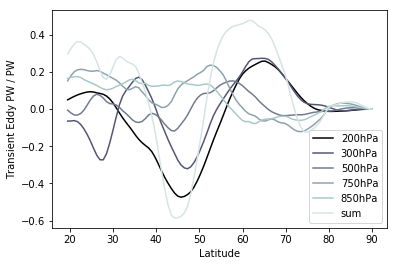

In [10]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 eddy transient zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    p200_eddy_season_series = meta.statistics.operator.seasons(p200_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p200_eddy_ERAI = meta.statistics.operator(p200_eddy_season_series[3:,:])
    stat_p200_eddy_ERAI.anomaly(Dim_month=False)
    stat_p200_eddy_ERAI.detrend()
    stat_p200_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p200, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p200_eddy_ERAI._lowpass)
    p300_eddy_season_series = meta.statistics.operator.seasons(p300_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p300_eddy_ERAI = meta.statistics.operator(p300_eddy_season_series[3:,:])
    stat_p300_eddy_ERAI.anomaly(Dim_month=False)
    stat_p300_eddy_ERAI.detrend()
    stat_p300_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p300, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p300_eddy_ERAI._lowpass)
    p400_eddy_season_series = meta.statistics.operator.seasons(p400_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p400_eddy_ERAI = meta.statistics.operator(p400_eddy_season_series[3:,:])
    stat_p400_eddy_ERAI.anomaly(Dim_month=False)
    stat_p400_eddy_ERAI.detrend()
    stat_p400_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p400, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p400_eddy_ERAI._lowpass)
    p500_eddy_season_series = meta.statistics.operator.seasons(p500_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p500_eddy_ERAI = meta.statistics.operator(p500_eddy_season_series[3:,:])
    stat_p500_eddy_ERAI.anomaly(Dim_month=False)
    stat_p500_eddy_ERAI.detrend()
    stat_p500_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p500, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p500_eddy_ERAI._lowpass)
    p600_eddy_season_series = meta.statistics.operator.seasons(p600_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p600_eddy_ERAI = meta.statistics.operator(p600_eddy_season_series[3:,:])
    stat_p600_eddy_ERAI.anomaly(Dim_month=False)
    stat_p600_eddy_ERAI.detrend()
    stat_p600_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p600, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p600_eddy_ERAI._lowpass)
    p750_eddy_season_series = meta.statistics.operator.seasons(p750_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p750_eddy_ERAI = meta.statistics.operator(p750_eddy_season_series[3:,:])
    stat_p750_eddy_ERAI.anomaly(Dim_month=False)
    stat_p750_eddy_ERAI.detrend()
    stat_p750_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p750, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p750_eddy_ERAI._lowpass)
    p850_eddy_season_series = meta.statistics.operator.seasons(p850_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p850_eddy_ERAI = meta.statistics.operator(p850_eddy_season_series[3:,:])
    stat_p850_eddy_ERAI.anomaly(Dim_month=False)
    stat_p850_eddy_ERAI.detrend()
    stat_p850_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p850, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p850_eddy_ERAI._lowpass)
    fig = plt.figure()
    colormap=cm.bone(np.linspace(0,1,9))
    # there is a bug for the E eddy decomposition
    # g has been divided by each variable
    # we should compensate it here
    plt.plot(latitude_eddy_ERAI, k_p200 * (level[14]-level[13]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[0], label='200hPa')
    plt.plot(latitude_eddy_ERAI, k_p300 * (level[17]-level[16]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[3], label='300hPa')
    #plt.plot(latitude_eddy_ERAI, k_p400 * constant['cp'] * (level[19]-level[18]) * 100 / constant['g'] * 480 / 1E+15, label='400hPa)
    plt.plot(latitude_eddy_ERAI, k_p500  * (level[21]-level[20]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[4], label='500hPa')
    #plt.plot(latitude_eddy_ERAI, k_p600 * constant['cp'] * (level[23]-level[22]) * 100 / constant['g'] * 480 / 1E+15, label='600hPa')
    plt.plot(latitude_eddy_ERAI, k_p750  * (level[26]-level[25]) * 100 / constant['g'] * 480 / 1E+15,color=colormap[5], label='750hPa')
    plt.plot(latitude_eddy_ERAI, k_p850  * (level[30]-level[29]) * 100 / constant['g'] * 480 / 1E+15,color=colormap[6], label='850hPa')
    # total eddy transport
    #k_total = (k_p200 * (level[14]-level[13]) + k_p300 * (level[17]-level[16]) + k_p400 * (level[19]-level[18]) +
    #           k_p500 * (level[21]-level[20]) + k_p600 * (level[23]-level[22]) + k_p750 * (level[26]-level[25]) +
    #           k_p850 * (level[30]-level[29])) * constant['cp'] * 100 / constant['g'] * 480 / 1E+15
    k_total = (k_p200 * (level[14]-level[13]) + k_p300 * (level[17]-level[16]) +
               k_p500 * (level[21]-level[20]) + k_p750 * (level[26]-level[25]) +
               k_p850 * (level[30]-level[29])) * 100 / constant['g'] * 480 / 1E+15
    plt.plot(latitude_eddy_ERAI, k_total, color=colormap[7], label='sum')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Transient Eddy PW / PW")
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_ERAI_eddy_E_transient_zonal_DJF_decadal_mean.png'.format(lag)),dpi=300)
    plt.close(fig)

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 overall transport zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of

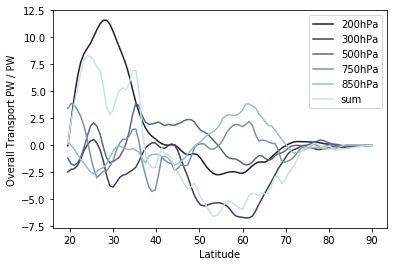

In [11]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 overall transport zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    p200_eddy_season_series = meta.statistics.operator.seasons(p200_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p200_eddy_ERAI = meta.statistics.operator(p200_eddy_season_series[3:,:])
    stat_p200_eddy_ERAI.anomaly(Dim_month=False)
    stat_p200_eddy_ERAI.detrend()
    stat_p200_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p200, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p200_eddy_ERAI._lowpass)
    p300_eddy_season_series = meta.statistics.operator.seasons(p300_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p300_eddy_ERAI = meta.statistics.operator(p300_eddy_season_series[3:,:])
    stat_p300_eddy_ERAI.anomaly(Dim_month=False)
    stat_p300_eddy_ERAI.detrend()
    stat_p300_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p300, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p300_eddy_ERAI._lowpass)
    p400_eddy_season_series = meta.statistics.operator.seasons(p400_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p400_eddy_ERAI = meta.statistics.operator(p400_eddy_season_series[3:,:])
    stat_p400_eddy_ERAI.anomaly(Dim_month=False)
    stat_p400_eddy_ERAI.detrend()
    stat_p400_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p400, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p400_eddy_ERAI._lowpass)
    p500_eddy_season_series = meta.statistics.operator.seasons(p500_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p500_eddy_ERAI = meta.statistics.operator(p500_eddy_season_series[3:,:])
    stat_p500_eddy_ERAI.anomaly(Dim_month=False)
    stat_p500_eddy_ERAI.detrend()
    stat_p500_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p500, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p500_eddy_ERAI._lowpass)
    p600_eddy_season_series = meta.statistics.operator.seasons(p600_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p600_eddy_ERAI = meta.statistics.operator(p600_eddy_season_series[3:,:])
    stat_p600_eddy_ERAI.anomaly(Dim_month=False)
    stat_p600_eddy_ERAI.detrend()
    stat_p600_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p600, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p600_eddy_ERAI._lowpass)
    p750_eddy_season_series = meta.statistics.operator.seasons(p750_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p750_eddy_ERAI = meta.statistics.operator(p750_eddy_season_series[3:,:])
    stat_p750_eddy_ERAI.anomaly(Dim_month=False)
    stat_p750_eddy_ERAI.detrend()
    stat_p750_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p750, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p750_eddy_ERAI._lowpass)
    p850_eddy_season_series = meta.statistics.operator.seasons(p850_overall_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p850_eddy_ERAI = meta.statistics.operator(p850_eddy_season_series[3:,:])
    stat_p850_eddy_ERAI.anomaly(Dim_month=False)
    stat_p850_eddy_ERAI.detrend()
    stat_p850_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p850, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p850_eddy_ERAI._lowpass)
    fig = plt.figure()
    colormap=cm.bone(np.linspace(0,1,8))
    plt.plot(latitude_eddy_ERAI, k_p200 * (level[14]-level[13]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='200hPa')
    plt.plot(latitude_eddy_ERAI, k_p300 * (level[17]-level[16]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[2], label='300hPa')
    #plt.plot(latitude_eddy_ERAI, k_p400 * (level[19]-level[18]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='400hPa')
    plt.plot(latitude_eddy_ERAI, k_p500 * (level[21]-level[20]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[3], label='500hPa')
    #plt.plot(latitude_eddy_ERAI, k_p600 * constant['cp'] * (level[23]-level[22]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='600hPa')
    plt.plot(latitude_eddy_ERAI, k_p750 * (level[26]-level[25]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[4], label='750hPa')
    plt.plot(latitude_eddy_ERAI, k_p850 * (level[30]-level[29]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[5], label='850hPa')
    k_total = (k_p200 * (level[14]-level[13]) + k_p300 * (level[17]-level[16]) +
               k_p500 * (level[21]-level[20]) + k_p750 * (level[26]-level[25]) +
               k_p850 * (level[30]-level[29])) * 100 / constant['g'] * 480 / 1E+15
    plt.plot(latitude_eddy_ERAI, k_total, color=colormap[6], label='sum')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Overall Transport PW / PW")
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_ERAI_eddy_E_overall_zonal_DJF_decadal_mean.png'.format(lag)),dpi=300)
    plt.close(fig)

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 eddy standing zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of mon

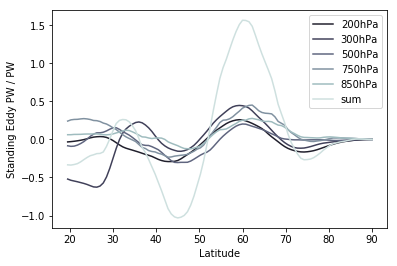

In [12]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 eddy standing zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    p200_eddy_season_series = meta.statistics.operator.seasons(p200_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p200_eddy_ERAI = meta.statistics.operator(p200_eddy_season_series[3:,:])
    stat_p200_eddy_ERAI.anomaly(Dim_month=False)
    stat_p200_eddy_ERAI.detrend()
    stat_p200_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p200, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p200_eddy_ERAI._lowpass)
    p300_eddy_season_series = meta.statistics.operator.seasons(p300_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p300_eddy_ERAI = meta.statistics.operator(p300_eddy_season_series[3:,:])
    stat_p300_eddy_ERAI.anomaly(Dim_month=False)
    stat_p300_eddy_ERAI.detrend()
    stat_p300_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p300, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p300_eddy_ERAI._lowpass)
    p400_eddy_season_series = meta.statistics.operator.seasons(p400_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p400_eddy_ERAI = meta.statistics.operator(p400_eddy_season_series[3:,:])
    stat_p400_eddy_ERAI.anomaly(Dim_month=False)
    stat_p400_eddy_ERAI.detrend()
    stat_p400_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p400, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p400_eddy_ERAI._lowpass)
    p500_eddy_season_series = meta.statistics.operator.seasons(p500_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p500_eddy_ERAI = meta.statistics.operator(p500_eddy_season_series[3:,:])
    stat_p500_eddy_ERAI.anomaly(Dim_month=False)
    stat_p500_eddy_ERAI.detrend()
    stat_p500_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p500, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p500_eddy_ERAI._lowpass)
    p600_eddy_season_series = meta.statistics.operator.seasons(p600_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p600_eddy_ERAI = meta.statistics.operator(p600_eddy_season_series[3:,:])
    stat_p600_eddy_ERAI.anomaly(Dim_month=False)
    stat_p600_eddy_ERAI.detrend()
    stat_p600_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p600, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p600_eddy_ERAI._lowpass)
    p750_eddy_season_series = meta.statistics.operator.seasons(p750_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p750_eddy_ERAI = meta.statistics.operator(p750_eddy_season_series[3:,:])
    stat_p750_eddy_ERAI.anomaly(Dim_month=False)
    stat_p750_eddy_ERAI.detrend()
    stat_p750_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p750, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p750_eddy_ERAI._lowpass)
    p850_eddy_season_series = meta.statistics.operator.seasons(p850_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p850_eddy_ERAI = meta.statistics.operator(p850_eddy_season_series[3:,:])
    stat_p850_eddy_ERAI.anomaly(Dim_month=False)
    stat_p850_eddy_ERAI.detrend()
    stat_p850_eddy_ERAI.lowpass(window=30, obj='detrend')
    k_p850, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p850_eddy_ERAI._lowpass)
    fig = plt.figure()
    # there is a bug for the E eddy decomposition
    # g has been divided by each variable
    # we should compensate it here
    colormap=cm.bone(np.linspace(0,1,8))
    plt.plot(latitude_eddy_ERAI, k_p200 * (level[14]-level[13]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='200hPa')
    plt.plot(latitude_eddy_ERAI, k_p300 * (level[17]-level[16]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[2], label='300hPa')
    #plt.plot(latitude_eddy_ERAI, k_p400 * (level[19]-level[18]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='400hPa')
    plt.plot(latitude_eddy_ERAI, k_p500 * (level[21]-level[20]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[3], label='500hPa')
    #plt.plot(latitude_eddy_ERAI, k_p600 * (level[23]-level[22]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[1], label='600hPa')
    plt.plot(latitude_eddy_ERAI, k_p750 * (level[26]-level[25]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[4], label='750hPa')
    plt.plot(latitude_eddy_ERAI, k_p850 * (level[30]-level[29]) * 100 / constant['g'] * 480 / 1E+15, color=colormap[5], label='850hPa')
    k_total = (k_p200 * (level[14]-level[13]) + k_p300 * (level[17]-level[16]) +
               k_p500 * (level[21]-level[20]) + k_p750 * (level[26]-level[25]) +
               k_p850 * (level[30]-level[29])) * 100 / constant['g'] * 480 / 1E+15
    plt.plot(latitude_eddy_ERAI, k_total, color=colormap[6], label='sum')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Standing Eddy PW / PW")
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_ERAI_eddy_E_standing_zonal_DJF_decadal_mean.png'.format(lag)),dpi=300)
    plt.close(fig)

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 steady mean flow zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 2D field.
This a regression with lead/lag analysis.
Positive lag means 2nd input leads 1st, vice versa.


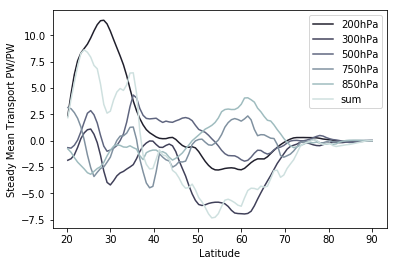

In [13]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 steady mean flow zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    # by default, the running mean is taken with a window of 60 months
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    E_vert_season_series = meta.statistics.operator.seasons(E_vert[:],
                                                            span=lag_winter[lag], Dim_month=True)
    stat_E_vert_ERAI = meta.statistics.operator(E_vert_season_series[3:])
    stat_E_vert_ERAI.anomaly(Dim_month=False)
    stat_E_vert_ERAI.detrend()
    stat_E_vert_ERAI.lowpass(window=30, obj='detrend')

    k, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                     stat_E_vert_ERAI._lowpass, lag)
    
    fig = plt.figure()
    colormap=cm.bone(np.linspace(0,1,8))
    plt.plot(latitude_fields_vert_ERAI[:94], k[14,:94], color=colormap[1], label='200hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], k[17,:94], color=colormap[2], label='300hPa')
    #plt.plot(latitude_fields_vert_ERAI[:94], k[19,:94], color=colormap[6], label='400hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], k[21,:94], color=colormap[3], label='500hPa')
    #plt.plot(latitude_fields_vert_ERAI[:94], k[23,:94], color=colormap[6], label='600hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], k[26,:94], color=colormap[4], label='750hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], k[30,:94], color=colormap[5], label='850hPa')
    k_total = (k[14,:94] + k[17,:94] + k[21,:94] + k[26,:94] + k[30,:94])
    plt.plot(latitude_fields_vert_ERAI[:94], k_total, color=colormap[6], label='sum')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Steady Mean Transport PW/PW")
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_ERAI_eddy_E_steady_mean_DJF_decadal_mean.png'.format(lag)),dpi=300)
    plt.close(fig)

***********!@#$%^&*     Vertical Profile of all the components   !@#$%^&***********
=====   p 200 500 850 steady mean / transient & standing eddies  ======


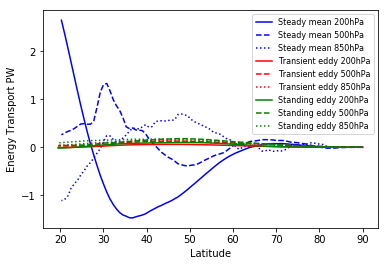

In [33]:
    print ('***********!@#$%^&*     Vertical Profile of all the components   !@#$%^&***********')
    print ('=====   p 200 500 850 steady mean / transient & standing eddies  ======')
    E_vert_clim = np.mean(np.mean(E_vert[:],0),0)
    p200_transient_clim = np.mean(np.mean(p200_transient_zonal_weight[:],0),0)\
                          * (level[14]-level[13]) * 100 / constant['g'] * 480 / 1E+15
    p500_transient_clim = np.mean(np.mean(p500_transient_zonal_weight[:],0),0)\
                          * (level[21]-level[20]) * 100 / constant['g'] * 480 / 1E+15
    p850_transient_clim = np.mean(np.mean(p850_transient_zonal_weight[:],0),0)\
                          * (level[30]-level[29]) * 100 / constant['g'] * 480 / 1E+15
    p200_standing_clim = np.mean(np.mean(p200_standing_zonal_weight[:],0),0)\
                          * (level[14]-level[13]) * 100 / constant['g'] * 480 / 1E+15
    p500_standing_clim = np.mean(np.mean(p500_standing_zonal_weight[:],0),0)\
                          * (level[21]-level[20]) * 100 / constant['g'] * 480 / 1E+15
    p850_standing_clim = np.mean(np.mean(p850_standing_zonal_weight[:],0),0)\
                          * (level[30]-level[29]) * 100 / constant['g'] * 480 / 1E+15
    fig = plt.figure()
    plt.plot(latitude_fields_vert_ERAI[:94], E_vert_clim[14,:94], 'b-', label='Steady mean 200hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], E_vert_clim[21,:94], 'b--', label='Steady mean 500hPa')
    plt.plot(latitude_fields_vert_ERAI[:94], E_vert_clim[30,:94], 'b:', label='Steady mean 850hPa')
    plt.plot(latitude_eddy_ERAI, p200_transient_clim,'r-', label='Transient eddy 200hPa')
    plt.plot(latitude_eddy_ERAI, p500_transient_clim,'r--', label='Transient eddy 500hPa')
    plt.plot(latitude_eddy_ERAI, p850_transient_clim,'r:', label='Transient eddy 850hPa')
    plt.plot(latitude_eddy_ERAI, p200_standing_clim,'g-', label='Standing eddy 200hPa')
    plt.plot(latitude_eddy_ERAI, p500_standing_clim,'g--', label='Standing eddy 500hPa')
    plt.plot(latitude_eddy_ERAI, p850_standing_clim,'g:', label='Standing eddy 850hPa')
    
    plt.xlabel("Latitude")
    plt.legend(loc=1,prop={'size': 8})
    plt.ylabel("Energy Transport PW")
    plt.show()
    fig.savefig(os.path.join(output_path, 'climatology',
                             'ERAI_eddy_E_climatology.png'),dpi=200)
    plt.close(fig)    

***********!@#$%^&*     Vertical Profile of all the components   !@#$%^&***********
=====   p 200 500 850 steady mean / transient & standing eddies anomalies ======
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!


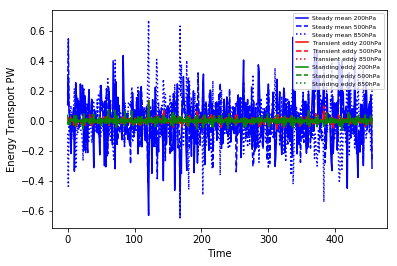

In [32]:
    print ('***********!@#$%^&*     Vertical Profile of all the components   !@#$%^&***********')
    print ('=====   p 200 500 850 steady mean / transient & standing eddies anomalies ======')  
    stat_steady_mean = meta.statistics.operator(E_vert[:])
    stat_steady_mean.anomaly(Dim_month=True)
    
    stat_transient_p200 = meta.statistics.operator(p200_transient_zonal_weight[:] * (level[14]-level[13])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_transient_p200.anomaly(Dim_month=True)
    
    stat_transient_p500 = meta.statistics.operator(p500_transient_zonal_weight[:] * (level[21]-level[20])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_transient_p500.anomaly(Dim_month=True)
    
    stat_transient_p850 = meta.statistics.operator(p850_transient_zonal_weight[:] * (level[30]-level[29])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_transient_p850.anomaly(Dim_month=True)
    
    stat_standing_p200 = meta.statistics.operator(p200_standing_zonal_weight[:] * (level[14]-level[13])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_standing_p200.anomaly(Dim_month=True)

    stat_standing_p500 = meta.statistics.operator(p500_standing_zonal_weight[:] * (level[21]-level[20])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_standing_p500.anomaly(Dim_month=True)

    stat_standing_p850 = meta.statistics.operator(p850_standing_zonal_weight[:] * (level[30]-level[29])
                                                   * 100 / constant['g'] * 480 / 1E+15)
    stat_standing_p850.anomaly(Dim_month=True)
    
    time_index = np.arange(len(year_eddy)*12)
    
    fig = plt.figure()
    plt.plot(time_index, stat_steady_mean._anomaly[:,14,40], 'b-', label='Steady mean 200hPa')
    plt.plot(time_index, stat_steady_mean._anomaly[:,21,40], 'b--', label='Steady mean 500hPa')
    plt.plot(time_index, stat_steady_mean._anomaly[:,30,40], 'b:', label='Steady mean 850hPa')
    plt.plot(time_index, stat_transient_p200._anomaly[:,40],'r-', label='Transient eddy 200hPa')
    plt.plot(time_index, stat_transient_p500._anomaly[:,40],'r--', label='Transient eddy 500hPa')
    plt.plot(time_index, stat_transient_p850._anomaly[:,40],'r:', label='Transient eddy 850hPa')
    plt.plot(time_index, stat_standing_p200._anomaly[:,40],'g-', label='Standing eddy 200hPa')
    plt.plot(time_index, stat_standing_p500._anomaly[:,40],'g--', label='Standing eddy 500hPa')
    plt.plot(time_index, stat_standing_p850._anomaly[:,40],'g:', label='Standing eddy 850hPa')
    
    plt.xlabel("Time")
    plt.legend(loc=1,prop={'size': 6})
    plt.ylabel("Energy Transport PW")
    plt.show()
    fig.savefig(os.path.join(output_path, 'climatology',
                             'ERAI_eddy_E_climatology_anomaly.png'),dpi=200)
    plt.close(fig)       

In [27]:
print(stat_steady_mean._anomaly.shape)
print(latitude_eddy_ERAI[40])

(456, 37, 121)
60.0
